In [72]:
import pandas as pd

### This notebook cannot be ran again. Still displays valuable information. Any outputs on here were most likely created again in a different notebook ###

In [898]:
#correlation metrics to consider: 
#which site is bringing in the most clicks
#which players are the most popular (keep on main page)
#any players making a quick rise? (to bring more attention to)

In [ ]:
database =  pd.read_gbq('''
SELECT * FROM `mlb-savant-prod-5db3.stats_db.baseball__players` 

''')

In [1255]:
data = database[['player_id', 'name_display_full_fml', 'name_last', 'name_first']]

In [1256]:
data['first_last'] = data['name_first'] + ' ' + data['name_last']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.com/v3/__https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html*returning-a-view-versus-a-copy*5Cn__;IyU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXHWaGMrQ$    """Entry point for launching an IPython kernel.


In [1257]:
data = data[['player_id', 'name_display_full_fml', 'first_last']]

In [1258]:
data.head()

,player_id,name_display_full_fml,first_last
0,430023,Juan Dominguez,Juan Dominguez
1,435578,Ricardo Avila,Ricardo Avila
2,435579,Lance Beeson,Lance Beeson
3,435580,John Chymczuk,John Chymczuk
4,435581,Joe Dimino,Joe Dimino


In [954]:
data[data['player_id'] == 'playerid-'+'518692']

,player_id,name_display_full_fml,first_last
111514,playerid-518692,Frederick Charles Freeman,Frederick Freeman


# Search Page

In [341]:
searches = pd.read_gbq('''

WITH initial_query AS (

SELECT DISTINCT page_url, visit
FROM `mlb-bdataml-prod-da8f.video_recommendation_engine_clickstream.blob_page_loads` 

    WHERE date_time_date = '2022-06-11'
    AND page_url LIKE 'https://urldefense.com/v3/__https://www.mlb.com/search*'*5Cn__;JSU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVo3rAqFA$  )

SELECT page_url, count(*) as visits
FROM initial_query
GROUP BY page_url
ORDER BY 2 desc
''')

Downloading: 100%|██████████| 4702/4702 [00:00<00:00, 17576.34rows/s]


In [342]:
searches['page_url'][23]

'https://urldefense.com/v3/__https://www.mlb.com/search?q=ohtani&playerId=660271__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUNJj8wFQ$  '

In [343]:
search_names = []
for i in searches['page_url']:
    m = re.search('(?<=playerId=)([^&]*)(?=&)?', i)
    if 'q=' in i and ('playerId' in i):
        n = re.search('(?<=playerId=)([^&]*)(?=&)?', i)
        search_names.append(n.group(0))
    else: 
        search_names.append("")
        continue

In [345]:
searches['construct'] = search_names

In [347]:
searches['player_id'] = search_names

In [350]:
searches['player_id'] = pd.to_numeric(searches["player_id"])
searches['player_id'] = (searches['player_id']).fillna(0.0).astype(int)

In [351]:
#searches
searches = searches[(searches != 0).all(1)]

In [372]:
test = searches.merge(data, how = 'left')

In [373]:
test

,page_url,visits,construct,player_id,name_display_full_fml
0,https://urldefense.com/v3/__https://www.mlb.com/search?q=kim&playerId=673490__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqX1atOb9A$,22,673490,673490,Ha-seong Kim
1,https://urldefense.com/v3/__https://www.mlb.com/search?q=ohtani&playerId=6__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUFDmMo-g$ ...,17,660271,660271,Shohei Ohtani
2,https://urldefense.com/v3/__https://www.mlb.com/search?q=clint&playerId=64__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXkCblZ2w$ ...,12,640449,640449,Clint Jackson Frazier
3,https://urldefense.com/v3/__https://www.mlb.com/search?q=moreno&playerId=6__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVLb809sw$ ...,10,672515,672515,Gabriel Jose Moreno
4,https://urldefense.com/v3/__https://www.mlb.com/search?q=acuna&playerId=66__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVTQYyggA$ ...,9,660670,660670,Ronald Jose Acuna Jr.
...,...,...,...,...,...
2390,https://urldefense.com/v3/__https://www.mlb.com/search?q=Antony*20de&playe__;JQ!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXmh13lCA$ ...,1,543101,543101,Anthony J. DeSclafani
2391,https://urldefense.com/v3/__https://www.mlb.com/search?q=Carlos*20to&playe__;JQ!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXejbJTcg$ ...,1,624636,624636,Carlos Daniel Tocci
2392,https://urldefense.com/v3/__https://www.mlb.com/search?q=brett*20gard&play__;JQ!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUsDKeryA$ ...,1,458731,458731,Brett M. Gardner
2393,https://urldefense.com/v3/__https://www.mlb.com/search?q=akiya&playerId=67__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqU0yNYw4g$ ...,1,673451,673451,Shogo Akiyama


In [375]:
sample_plot = test.head()

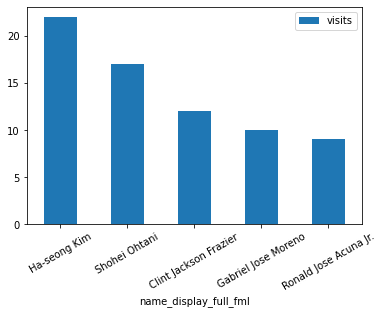

In [377]:
ax = sample_plot.plot.bar(x='name_display_full_fml', y='visits', rot=30)

# Film Room Search

In [579]:
film_room_searches = pd.read_gbq('''

WITH initial_query AS (

SELECT DISTINCT page_url, visit
FROM `mlb-bdataml-prod-da8f.video_recommendation_engine_clickstream.blob_page_loads` 

    WHERE date_time_date = '2022-06-11'
    AND page_url LIKE 'https://urldefense.com/v3/__https://www.mlb.com/video/search?q=*'*5Cn__;JSU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWhR2HZSw$  )

SELECT page_url, count(*) as visits
FROM initial_query
GROUP BY page_url
ORDER BY 2 desc
''')

Downloading: 100%|██████████| 1735/1735 [00:00<00:00, 9646.03rows/s]


In [581]:
film_room_searches['page_url'][0]

'https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Jordan*Lyles&qt=FREETEXT&partnerId=pickle-success_screen__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWWtoHoWw$  '

In [582]:
queries = []
for i in film_room_searches['page_url']:
    m = re.search('(?<=q=)([^&]*)(?=&)?', i)
    if len(m.group(0)) < 30:
        queries.append(m.group(0))
    else: 
        queries.append("")

In [583]:
queries = []
for i in film_room_searches['page_url']:
    m = re.search('(?<=q=)([^&]*)(?=&)?', i)
    if len(m.group(0)) < 30:
        queries.append(m.group(0))
    else: 
        queries.append("")
film_room_searches['construct'] = queries
for i in film_room_searches['construct']:
    if '+' in i:
        film_room_searches['construct'].apply(lambda x: x.replace('+',' '))
    else:
        continue
        
film_room_searches['construct'] = film_room_searches['construct'].apply(lambda x: x.replace('+',' '))
film_room_searches['first_last'] = film_room_searches['construct']
film_merged = film_room_searches.merge(data, how = 'left')
film_merged = film_merged.dropna()

In [584]:
for i in film_room_searches['construct']:
    if '+' in i:
        film_room_searches['construct'].apply(lambda x: x.replace('+',' '))
    else:
        continue

In [585]:
film_room_searches['construct'] = film_room_searches['construct'].apply(lambda x: x.replace('+',' '))

In [586]:
film_room_searches['first_last'] = film_room_searches['construct']

In [588]:
film_merged = film_room_searches.merge(data, how = 'left')

In [592]:
film_merged = film_merged.dropna()

In [593]:
film_merged

,page_url,visits,construct,first_last,player_id,name_display_full_fml
0,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Jordan*Lyle__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXSbJ8FPw$ ...,456,Jordan Lyles,Jordan Lyles,543475.0,Jordan Horton Lyles
10,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Randy*Aroza__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVRXgeW-w$ ...,24,Randy Arozarena,Randy Arozarena,668227.0,Randy Arozarena
31,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Shohei*Ohta__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqV_eZ3moQ$ ...,11,Shohei Ohtani,Shohei Ohtani,660271.0,Shohei Ohtani
85,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Blake*Snell__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVik3N6RQ$ ...,5,Blake Snell,Blake Snell,605483.0,Blake Ashton Snell
107,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Shane*McCla__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqU0Sw1kEA$ ...,4,Shane McClanahan,Shane McClanahan,663556.0,Shane McClanahan
122,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=German*Marq__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqW7momnnw$ ...,4,German Marquez,German Marquez,608566.0,German Andres Marquez
193,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Yu*Darvish&__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWHhP0yJQ$ ...,3,Yu Darvish,Yu Darvish,506433.0,Yu Darvish
234,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Kyle*Schwar__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXVfbEVCQ$ ...,2,Kyle Schwarber,Kyle Schwarber,656941.0,Kyle Joseph Schwarber
248,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Brian*Ander__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVf7N5Tjw$ ...,2,Brian Anderson,Brian Anderson,110230.0,Brian James Anderson
249,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Brian*Ander__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVf7N5Tjw$ ...,2,Brian Anderson,Brian Anderson,470443.0,Brian P Anderson


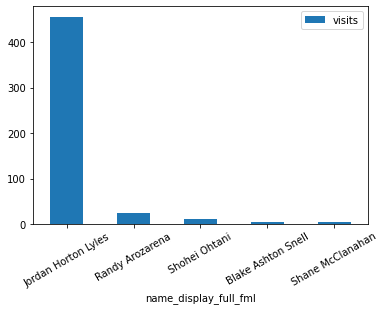

In [594]:
ax = film_merged.head().plot.bar(x='name_display_full_fml', y='visits', rot=30)

# Page Loads

In [399]:
savant_page_loads = pd.read_gbq('''

WITH initial_query AS (

SELECT DISTINCT page_url, visit
FROM `mlb-bdataml-prod-da8f.video_recommendation_engine_clickstream.blob_page_loads` 

    WHERE date_time_date = '2022-06-11'
    AND page_url LIKE 'https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player*'*5Cn__;JSU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWPR02sRA$  )

SELECT page_url, count(*) as visits
FROM initial_query
GROUP BY page_url
ORDER BY 2 desc


''')

Downloading: 100%|██████████| 6287/6287 [00:00<00:00, 19949.00rows/s]


In [401]:
savant_page_loads['page_url'][0]

'https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/jake-burger-669394__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUa2gHj-g$  '

In [402]:
savant_names = []
for i in savant_page_loads['page_url']:
    if '?' in i:
        m = re.search('[^\/]+(.)?\?', i)
        temp = m.group(0)
        savant_names.append(temp[:-1])
    else:
        m = re.search('[^/]+(?=/$|$)', i)
        savant_names.append(m.group(0))

In [403]:
savant_page_loads['construct'] = savant_names

In [405]:
savant_page_loads['name'] = savant_page_loads['construct'].apply(lambda x: "-".join(x.split("-")[:2]))
savant_page_loads['name'] = savant_page_loads['name'].apply(lambda x: x.replace('-',' '))
savant_page_loads['player_id'] = savant_page_loads['construct'].apply(lambda x: x.split('-')[-1:][0])
savant_page_loads = savant_page_loads.head(3000)
savant_page_loads['player_id'] = pd.to_numeric(savant_page_loads["player_id"])
savant_page_loads['player_id'] = (savant_page_loads['player_id']).fillna(0.0).astype(int)

In [436]:
savant_page_loads['player_id'] = savant_page_loads['construct'].apply(lambda x: x.split('-')[-1:][0])#savant_page_loads['construct'].apply(lambda x: "-".join(x.split("-")[2:]))

In [485]:
savant_page_loads = savant_page_loads.head(3000)

In [488]:
savant_page_loads['player_id'] = pd.to_numeric(savant_page_loads["player_id"])
savant_page_loads['player_id'] = (savant_page_loads['player_id']).fillna(0.0).astype(int)

In [528]:
savant_merged = savant_page_loads.merge(data, how = 'left')

In [529]:
savant_merged

,page_url,visits,construct,name,player_id,name_display_full_fml
0,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/j__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVJSM2nqg$ ...,1050,jake-burger-669394,jake burger,669394,Jacob Michael Burger
1,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/a__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUTs7dp5Q$ ...,947,aaron-judge-592450,aaron judge,592450,Aaron James Judge
2,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/m__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWlW1CkoA$ ...,655,mj-melendez-669004,mj melendez,669004,Mervyl S. Melendez
3,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/m__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWlW1CkoA$ ...,582,matt-swarmer-664161,matt swarmer,664161,Matthew L. Swarmer
4,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/s__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqW3mSKPCQ$ ...,532,spencer-strider-675911,spencer strider,675911,Spencer Robert Strider
...,...,...,...,...,...,...
2995,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/d__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWAFd3eFw$ ...,2,duane-underwood-jr-621249,duane underwood,621249,Duane Lee Underwood Jr.
2996,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/b__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUnQr3kkA$ ...,2,blake-snell-605483,blake snell,605483,Blake Ashton Snell
2997,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/l__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWbDTZK0g$ ...,2,luis-arraez-650333,luis arraez,650333,Luis Sangel Arraez
2998,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/n__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXPIEc4_A$ ...,2,nick-ahmed-605113,nick ahmed,605113,Nicholas Mark Ahmed


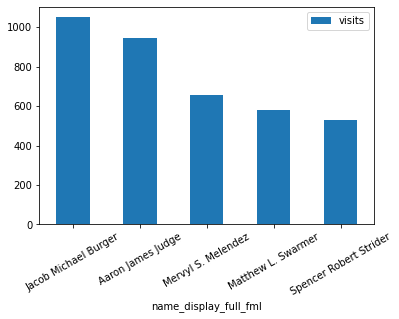

In [530]:
ax = savant_merged.head().plot.bar(x='name_display_full_fml', y='visits', rot=30)

# Player Page Loads

In [512]:
player_page_loads = pd.read_gbq('''

WITH initial_query AS (

SELECT DISTINCT page_url, visit
FROM `mlb-bdataml-prod-da8f.video_recommendation_engine_clickstream.blob_page_loads` 

    WHERE date_time_date = '2022-06-11'
    AND (page_url LIKE '%mlb.com/player/%')
)

SELECT page_url, count(*) as visits
FROM initial_query
GROUP BY page_url
ORDER BY 2 desc


''')

Downloading: 100%|██████████| 23708/23708 [00:00<00:00, 30222.58rows/s]


In [513]:
player_page_loads['page_url'][0]

'https://urldefense.com/v3/__https://www.mlb.com/player/matt-swarmer-664161__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqW9H9rCBA$  '

In [514]:
names = []
for i in player_page_loads['page_url']:
    if '?' in i:
        m = re.search('[^\/]+(.)?\?', i)
        temp = m.group(0)
        names.append(temp[:-1])
    else:
        m = re.search('[^/]+(?=/$|$)', i)
        if '#' in m.group(0):
            n = re.search('^[^#]*',m.group(0))
            names.append(n.group(0))
        else:
            names.append(m.group(0))

In [515]:
player_page_loads['construct'] = names

In [516]:
player_page_loads['name'] = player_page_loads['construct'].apply(lambda x: "-".join(x.split("-")[:2]))

In [517]:
player_page_loads['name'] = player_page_loads['name'].apply(lambda x: x.replace('-',' '))

In [519]:
player_page_loads['player_id'] = player_page_loads['construct'].apply(lambda x: x.split('-')[-1:][0])

In [520]:
player_page_loads = player_page_loads.head(3000)

In [522]:
player_page_loads['player_id'] = pd.to_numeric(player_page_loads["player_id"])
player_page_loads['player_id'] = (player_page_loads['player_id']).fillna(0.0).astype(int)

In [524]:
merged = player_page_loads.merge(data, how = 'left')

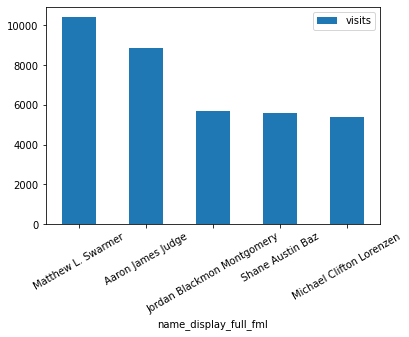

In [526]:
ax = merged.head().plot.bar(x='name_display_full_fml', y='visits', rot=30)

In [611]:
dates = ['2022-05-11']

In [614]:
player_page_loads = pd.read_gbq('''

    WITH initial_query AS (

    SELECT DISTINCT page_url, visit
    FROM `mlb-bdataml-prod-da8f.video_recommendation_engine_clickstream.blob_page_loads` 

        WHERE date_time_date = '2022-04-08'
        AND (page_url LIKE '%mlb.com/player/%')
    )

    SELECT page_url, count(*) as visits
    FROM initial_query
    GROUP BY page_url
    ORDER BY 2 desc


    ''')

Downloading: 100%|██████████| 21956/21956 [00:00<00:00, 37972.26rows/s]


In [630]:
names = []
for i in player_page_loads['page_url']:
    if '?' in i:
        m = re.search('[^\/]+(.)?\?', i)
        temp = m.group(0)
        names.append(temp[:-1])
    else:
        m = re.search('[^/]+(?=/$|$)', i)
        if '#' in m.group(0):
            n = re.search('^[^#]*',m.group(0))
            names.append(n.group(0))
        else:
            names.append(m.group(0))

In [636]:
player_page_loads['construct'] = names
player_page_loads['name'] = player_page_loads['construct'].apply(lambda x: "-".join(x.split("-")[:2]))
player_page_loads['name'] = player_page_loads['name'].apply(lambda x: x.replace('-', ' '))
player_page_loads['player_id'] = player_page_loads['construct'].apply(lambda x: x.split('-')[-1:][0])
player_page_loads = player_page_loads.head(3000)
player_page_loads['player_id'] = pd.to_numeric(player_page_loads["player_id"])
player_page_loads['player_id'] = (player_page_loads['player_id']).fillna(0.0).astype(int)


In [637]:
merged2 = player_page_loads.merge(data, how = 'left')


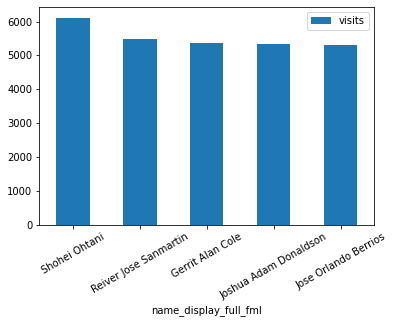

In [639]:
ax = merged2.head().plot.bar(x='name_display_full_fml', y='visits', rot=30)

In [755]:
#top 100 players (from markerting)

In [595]:
metrics = pd.read_csv('data/player_search_metrics.csv')

In [596]:
metrics

,Keywords,Traffic Share,Volume,CPC,Leader,Clicked,Non-Clicked,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
0,shohei ohtani,16.37%,"1,000,080",$0.86,mlb.com,44.35%,55.65%,"919,061","1,396,720","1,424,405","3,522,067","1,526,172","1,112,328","579,079","446,508","237,176","328,635","252,952","255,862"
1,freddie freeman,4.97%,"506,309",$2.88,baseball-reference.com,43.16%,56.84%,"234,470","148,131","99,382","214,942","196,105","120,110","508,577","930,444","414,413","207,846","244,103","2,757,190"
2,mike trout,4.52%,"428,286",$0.69,baseball-reference.com,43.35%,56.65%,"760,428","848,119","484,105","874,295","676,181","326,054","246,467","182,973","130,324","164,884","182,300","263,313"
3,max scherzer,4.36%,"400,615",$0.82,baseball-reference.com,42.85%,57.15%,"180,133","195,950","345,213","948,819","456,773","552,683","668,647","738,866","207,011","98,085","114,821","300,379"
4,jacob degrom,3.76%,"281,489",$0.71,baseball-reference.com,44.51%,55.49%,"557,062","409,848","1,096,135","518,797","239,974","149,306","76,253","74,811","51,272","32,583","43,850","127,979"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,robert hassell,0.04%,"3,937",$0.30,milb.com,36.95%,63.05%,"2,503","3,999","2,779","8,748","5,833","6,222","3,564","1,158","1,077","1,581","3,626","6,154"
97,xavier edwards,0.04%,"3,038",$1.07,baseball-reference.com,56.36%,43.64%,"1,916","4,839","3,719","4,989","4,199","1,845","1,820","2,668","4,727","2,858",960,"1,919"
98,robert hassell iii,0.02%,"1,253",$0.09,mlb.com,52.15%,47.85%,"1,029","2,460",480,"6,279",688,948,"1,020",693,260,260,600,330
99,ke’bryan hayes,0.02%,"1,073",$0.25,baseball-reference.com,57.27%,42.73%,"1,763","1,103","2,918","1,305","1,855",727,304,"1,183",0,982,210,536


### Player Search Merge with Top 100

In [720]:
test['Keywords'] = test['name_display_full_fml'].str.lower()

In [721]:
test_metric_merge = test.merge(metrics, how = 'left')

In [722]:
test_metric_merge = test_metric_merge[test_metric_merge['Volume'].notna()]

In [723]:
sorts = pd.DataFrame(test_metric_merge.groupby('name_display_full_fml')['visits'].sum().sort_values(ascending=False))

In [724]:
sorts = sorts.reset_index()

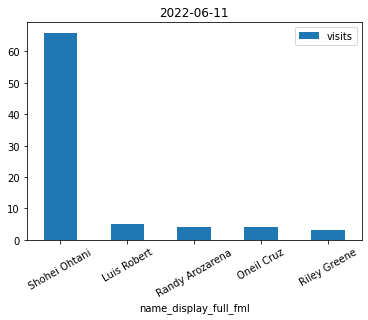

In [829]:
ax = sorts.head().plot.bar(x='name_display_full_fml', y='visits', rot=30, title = '2022-06-11')

### Film Search Merge with Top 100

In [692]:
film_merged['Keywords'] = film_merged['construct']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.com/v3/__https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html*returning-a-view-versus-a-copy*5Cn__;IyU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXHWaGMrQ$    """Entry point for launching an IPython kernel.


In [693]:
film_metric_merge = film_merged.merge(metrics, how = 'left')

In [694]:
film_metric_merge = film_metric_merge[film_metric_merge['Volume'].notna()]

In [695]:
film_metric_merge

,page_url,visits,construct,first_last,player_id,name_display_full_fml,Keywords,Traffic Share,Volume,CPC,...,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
1,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Randy*Aroza__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVRXgeW-w$ ...,24,Randy Arozarena,Randy Arozarena,668227.0,Randy Arozarena,randy arozarena,0.66%,"59,868",$1.55,...,"55,662","49,248","60,302","42,939","216,159","52,844","24,240","23,655","13,827","34,167"
2,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Shohei*Ohta__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqV_eZ3moQ$ ...,11,Shohei Ohtani,Shohei Ohtani,660271.0,Shohei Ohtani,shohei ohtani,16.37%,"1,000,080",$0.86,...,"1,424,405","3,522,067","1,526,172","1,112,328","579,079","446,508","237,176","328,635","252,952","255,862"
3,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Blake*Snell__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVik3N6RQ$ ...,5,Blake Snell,Blake Snell,605483.0,Blake Ashton Snell,blake snell,0.65%,"67,037",$0.21,...,"130,326","102,489","83,628","100,556","34,946","11,539","8,238","14,359","6,406","38,733"
15,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Aaron*Judge__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWQuZod6g$ ...,2,Aaron Judge,Aaron Judge,592450.0,Aaron James Judge,aaron judge,2.31%,"262,980",$1.31,...,"284,307","501,077","338,763","390,165","282,363","130,608","120,487","70,918","78,559","246,455"
18,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Giancarlo*S__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWed_PpiQ$ ...,2,Giancarlo Stanton,Giancarlo Stanton,519317.0,Giancarlo Cruz-Michael Stanton,giancarlo stanton,1.72%,"165,700",$0.52,...,"168,922","206,059","270,489","358,993","183,735","70,230","54,723","30,430","43,932","88,539"
27,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Shane*Baz&q__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVZi54zvw$ ...,1,Shane Baz,Shane Baz,669358.0,Shane Austin Baz,shane baz,0.33%,"22,337",$0.01,...,"22,595","32,580","38,376","48,397","50,549","5,163","10,524","5,099","6,146","36,805"
35,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Nolan*Arena__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUirDjrtg$ ...,1,Nolan Arenado,Nolan Arenado,571448.0,Nolan James Arenado,nolan arenado,0.98%,"106,649",$2.26,...,"142,139","178,139","92,023","122,451","106,210","50,693","42,277","26,504","11,162","94,337"
37,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Gabriel*Mor__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUKf0ijng$ ...,1,Gabriel Moreno,Gabriel Moreno,672515.0,Gabriel Jose Moreno,gabriel moreno,0.20%,"11,515",$0.54,...,"18,796","10,477","11,119","9,098","8,205","20,844","9,070","7,711","6,856","23,203"
39,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Camilo*Dova__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXcQX_V_w$ ...,1,Camilo Doval,Camilo Doval,666808.0,Camilo Doval,camilo doval,0.15%,"14,210",$0.20,...,400,"3,701","3,094","33,363","82,869","4,489","6,325","5,874","2,102","12,558"


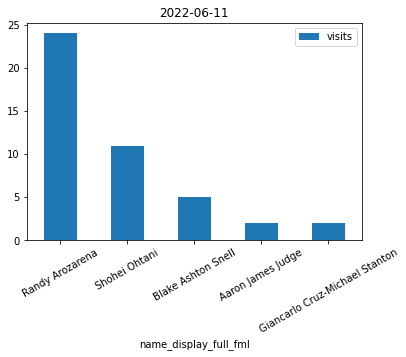

In [832]:
ax = film_metric_merge.head().plot.bar(x='name_display_full_fml', y='visits', rot=30, title = '2022-06-11')

### Savant Page Merged with Top 100

In [605]:
savant_merged['Keywords'] = savant_merged['name'] 

In [606]:
savant_metric_merge = savant_merged.merge(metrics, how = 'left')

In [608]:
savant_metric_merge = savant_metric_merge[savant_metric_merge['Volume'].notna()]

In [609]:
savant_metric_merge

,page_url,visits,construct,name,player_id,name_display_full_fml,Keywords,Traffic Share,Volume,CPC,...,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
1,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/a__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUTs7dp5Q$ ...,947,aaron-judge-592450,aaron judge,592450,Aaron James Judge,aaron judge,2.31%,"262,980",$1.31,...,"284,307","501,077","338,763","390,165","282,363","130,608","120,487","70,918","78,559","246,455"
5,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/h__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWQe6JFKw$ ...,479,hunter-greene-668881,hunter greene,668881,Christian Hunter Greene,hunter greene,0.21%,"13,961",$0.10,...,"30,557","16,492","18,711","8,366","6,767","7,197","3,213","4,900","10,527","32,831"
6,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/s__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqW3mSKPCQ$ ...,474,shohei-ohtani-660271,shohei ohtani,660271,Shohei Ohtani,shohei ohtani,16.37%,"1,000,080",$0.86,...,"1,424,405","3,522,067","1,526,172","1,112,328","579,079","446,508","237,176","328,635","252,952","255,862"
10,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/b__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUnQr3kkA$ ...,389,bryson-stott-681082,bryson stott,681082,Bryson Jeremy Stott,bryson stott,0.10%,"8,578",$0.43,...,"10,239","8,541","9,984","7,903","2,078","8,310","2,016","3,296","1,582","37,262"
11,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/l__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWbDTZK0g$ ...,374,lucas-giolito-608337,lucas giolito,608337,Lucas F. Giolito,lucas giolito,0.44%,"30,317",$0.44,...,"39,888","44,206","44,564","15,720","34,987","16,126","7,142","7,649","4,928","22,473"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/k__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVEtMgoHg$ ...,2,kris-bryant-592178,kris bryant,592178,Kristopher Lee Bryant,kris bryant,3.47%,"379,601",$1.23,...,"210,314","1,343,289","619,801","273,616","256,944","240,922","238,055","134,550","130,805","654,999"
2929,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/g__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXzvjU4EA$ ...,2,gabriel-moreno-672515,gabriel moreno,672515,Gabriel Jose Moreno,gabriel moreno,0.20%,"11,515",$0.54,...,"18,796","10,477","11,119","9,098","8,205","20,844","9,070","7,711","6,856","23,203"
2940,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/t__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqX8qx4l9g$ ...,2,trea-turner-607208,trea turner,607208,Trea Vance Turner,trea turner,1.57%,"132,597",$1.33,...,"61,713","388,174","365,677","142,445","259,288","58,560","56,632","21,428","22,187","93,477"
2966,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/b__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUnQr3kkA$ ...,2,brennen-davis-680695,brennen davis,680695,Brennen Davis,brennen davis,0.07%,"5,044",$0.50,...,"3,434","15,778","8,691","7,470","1,913","1,168","2,582",740,"2,999","13,470"


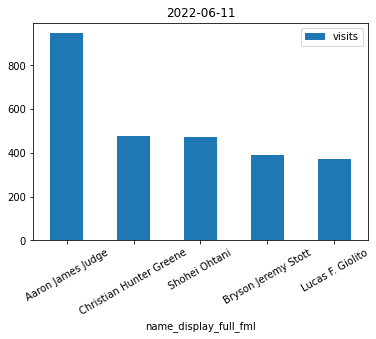

In [831]:
ax = savant_metric_merge.head().plot.bar(x='name_display_full_fml', y='visits', rot=30, title = '2022-06-11')

### Player Page Merged With Top 100

In [599]:
merged['Keywords'] = merged['name'] 

In [600]:
metric_merge = merged.merge(metrics, how = 'left')

In [603]:
metric_merge = metric_merge[metric_merge['Volume'].notna()]

In [644]:
metric_merge

,page_url,visits,construct,name,player_id,name_display_full_fml,Keywords,Traffic Share,Volume,CPC,...,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
1,https://urldefense.com/v3/__https://www.mlb.com/player/aaron-judge-592450__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVlXeGh_Q$,8863,aaron-judge-592450,aaron judge,592450,Aaron James Judge,aaron judge,2.31%,"262,980",$1.31,...,"284,307","501,077","338,763","390,165","282,363","130,608","120,487","70,918","78,559","246,455"
3,https://urldefense.com/v3/__https://www.mlb.com/player/shane-baz-669358__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUPiC1s2Q$,5611,shane-baz-669358,shane baz,669358,Shane Austin Baz,shane baz,0.33%,"22,337",$0.01,...,"22,595","32,580","38,376","48,397","50,549","5,163","10,524","5,099","6,146","36,805"
6,https://urldefense.com/v3/__https://www.mlb.com/player/shohei-ohtani-660271__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqU13e5xGw$,5261,shohei-ohtani-660271,shohei ohtani,660271,Shohei Ohtani,shohei ohtani,16.37%,"1,000,080",$0.86,...,"1,424,405","3,522,067","1,526,172","1,112,328","579,079","446,508","237,176","328,635","252,952","255,862"
10,https://urldefense.com/v3/__https://www.mlb.com/player/hunter-greene-668881__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUVB-FM3g$,4418,hunter-greene-668881,hunter greene,668881,Christian Hunter Greene,hunter greene,0.21%,"13,961",$0.10,...,"30,557","16,492","18,711","8,366","6,767","7,197","3,213","4,900","10,527","32,831"
18,https://urldefense.com/v3/__https://www.mlb.com/player/mackenzie-gore-669022__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVVcDHtNg$,3463,mackenzie-gore-669022,mackenzie gore,669022,MacKenzie Evan Gore,mackenzie gore,0.42%,"21,124",$0.90,...,"34,074","42,666","37,101","13,813","6,996","4,854","3,131","2,420","3,965","33,519"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,https://urldefense.com/v3/__https://www.mlb.com/player/shohei-ohtani-66027__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVSs8dcMA$ ...,5,shohei-ohtani-660271,shohei ohtani,660271,Shohei Ohtani,shohei ohtani,16.37%,"1,000,080",$0.86,...,"1,424,405","3,522,067","1,526,172","1,112,328","579,079","446,508","237,176","328,635","252,952","255,862"
2749,https://urldefense.com/v3/__https://www.mlb.com/player/shane-baz-669358*st__;Iw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqU3ydCo8Q$ ...,5,shane-baz-669358,shane baz,669358,Shane Austin Baz,shane baz,0.33%,"22,337",$0.01,...,"22,595","32,580","38,376","48,397","50,549","5,163","10,524","5,099","6,146","36,805"
2787,https://urldefense.com/v3/__https://www.mlb.com/player/shohei-ohtani-66027__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVSs8dcMA$ ...,5,shohei-ohtani-660271,shohei ohtani,660271,Shohei Ohtani,shohei ohtani,16.37%,"1,000,080",$0.86,...,"1,424,405","3,522,067","1,526,172","1,112,328","579,079","446,508","237,176","328,635","252,952","255,862"
2805,https://urldefense.com/v3/__https://www.mlb.com/player/adley-rutschman-668__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqX-0XOusA$ ...,5,adley-rutschman-668939,adley rutschman,668939,Adley Stan Rutschman,adley rutschman,0.74%,"43,645",$0.16,...,"70,024","65,768","73,243","31,259","22,381","15,252","17,662","14,993","32,788","75,301"


In [779]:
metric_merge[metric_merge['name'] == 'freddie freeman']

,page_url,visits,construct,name,player_id,name_display_full_fml,Keywords,Traffic Share,Volume,CPC,...,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
42,https://urldefense.com/v3/__https://www.mlb.com/player/freddie-freeman-518692__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXTBwDL6g$,2036,freddie-freeman-518692,freddie freeman,518692,Frederick Charles Freeman,freddie freeman,4.97%,"506,309",$2.88,...,99382,"214,942","196,105","120,110","508,577","930,444","414,413","207,846","244,103","2,757,190"
1320,https://urldefense.com/v3/__https://www.mlb.com/player/freddie-freeman-518__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqW-qoQf0A$ ...,21,freddie-freeman-518692,freddie freeman,518692,Frederick Charles Freeman,freddie freeman,4.97%,"506,309",$2.88,...,99382,"214,942","196,105","120,110","508,577","930,444","414,413","207,846","244,103","2,757,190"


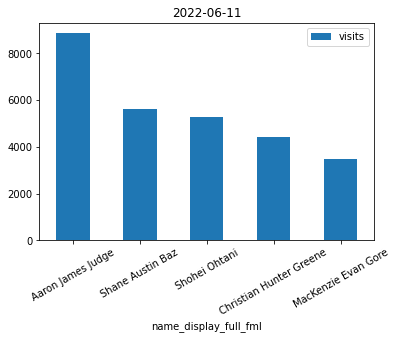

In [833]:
ax = metric_merge.head().plot.bar(x='name_display_full_fml', y='visits', rot=30, title = '2022-06-11')

In [640]:
merged2['Keywords'] = merged2['name'] 

In [641]:
metric_merge2 = merged2.merge(metrics, how = 'left')

In [642]:
metric_merge2 = metric_merge2[metric_merge2['Volume'].notna()]

In [645]:
metric_merge2

,page_url,visits,construct,name,player_id,name_display_full_fml,first_last,Keywords,Traffic Share,Volume,...,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
0,https://urldefense.com/v3/__https://www.mlb.com/player/shohei-ohtani-660271__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqU13e5xGw$,6118,shohei-ohtani-660271,shohei ohtani,660271,Shohei Ohtani,Shohei Ohtani,shohei ohtani,16.37%,"1,000,080",...,"1,424,405","3,522,067","1,526,172","1,112,328","579,079","446,508","237,176","328,635","252,952","255,862"
2,https://urldefense.com/v3/__https://www.mlb.com/player/gerrit-cole-543037__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWyBu2fWw$,5365,gerrit-cole-543037,gerrit cole,543037,Gerrit Alan Cole,Gerrit Cole,gerrit cole,2.49%,"215,651",...,"493,525","404,234","239,516","318,499","343,290","80,579","56,072","21,884","40,765","70,766"
9,https://urldefense.com/v3/__https://www.mlb.com/player/aaron-judge-592450__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVlXeGh_Q$,4374,aaron-judge-592450,aaron judge,592450,Aaron James Judge,Aaron Judge,aaron judge,2.31%,"262,980",...,"284,307","501,077","338,763","390,165","282,363","130,608","120,487","70,918","78,559","246,455"
16,https://urldefense.com/v3/__https://www.mlb.com/player/max-scherzer-453286__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVA9sunhw$,3936,max-scherzer-453286,max scherzer,453286,Maxwell M. Scherzer,Maxwell Scherzer,max scherzer,4.36%,"400,615",...,"345,213","948,819","456,773","552,683","668,647","738,866","207,011","98,085","114,821","300,379"
19,https://urldefense.com/v3/__https://www.mlb.com/player/lucas-giolito-608337__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUrTPPSGg$,3176,lucas-giolito-608337,lucas giolito,608337,Lucas F. Giolito,Lucas Giolito,lucas giolito,0.44%,"30,317",...,"39,888","44,206","44,564","15,720","34,987","16,126","7,142","7,649","4,928","22,473"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,https://urldefense.com/v3/__https://www.mlb.com/player/robert-hassell-iii-__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXrukUqSA$ ...,7,robert-hassell-iii-690987,robert hassell,690987,Robert Harris Hassell III,Robert Hassell,robert hassell,0.04%,"3,937",...,"2,779","8,748","5,833","6,222","3,564","1,158","1,077","1,581","3,626","6,154"
2940,https://urldefense.com/v3/__https://www.mlb.com/player/brennen-davis-68069__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVQo4VlUw$ ...,7,brennen-davis-680695,brennen davis,680695,Brennen Davis,Brennen Davis,brennen davis,0.07%,"5,044",...,"3,434","15,778","8,691","7,470","1,913","1,168","2,582",740,"2,999","13,470"
2959,https://urldefense.com/v3/__https://www.mlb.com/player/shohei-ohtani-66027__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVSs8dcMA$ ...,6,shohei-ohtani-660271,shohei ohtani,660271,Shohei Ohtani,Shohei Ohtani,shohei ohtani,16.37%,"1,000,080",...,"1,424,405","3,522,067","1,526,172","1,112,328","579,079","446,508","237,176","328,635","252,952","255,862"
2965,https://urldefense.com/v3/__https://www.mlb.com/player/shohei-ohtani-66027__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVSs8dcMA$ ...,6,shohei-ohtani-660271,shohei ohtani,660271,Shohei Ohtani,Shohei Ohtani,shohei ohtani,16.37%,"1,000,080",...,"1,424,405","3,522,067","1,526,172","1,112,328","579,079","446,508","237,176","328,635","252,952","255,862"


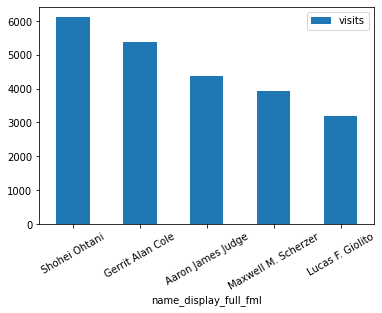

In [643]:
ax = metric_merge2.head().plot.bar(x='name_display_full_fml', y='visits', rot=30)

In [715]:
(metric_merge['name'].unique())

array(['aaron judge', 'shane baz', 'shohei ohtani', 'hunter greene',
       'mackenzie gore', 'lucas giolito', 'bryce harper', 'mike trout',
       'giancarlo stanton', 'manny machado', 'ronald acuna',
       'freddie freeman', 'gabriel moreno', 'jose ramirez',
       'mookie betts', 'vladimir guerrero', 'pete alonso',
       'rafael devers', 'adley rutschman', 'jazz chisholm', 'juan soto',
       'marcus semien', 'julio rodriguez', 'matt olson',
       'francisco lindor', 'cody bellinger', 'corey seager',
       'walker buehler', 'bo bichette', 'bryson stott', 'trea turner',
       'austin riley', 'carlos correa', 'nolan arenado',
       'christian yelich', 'trevor story', 'camilo doval', 'ozzie albies',
       'gerrit cole', 'bobby witt', 'randy arozarena', 'luis robert',
       'nolan gorman', 'alex bregman', 'max fried', 'spencer torkelson',
       'jorge soler', 'kyle tucker', 'kris bryant', 'harrison bader',
       'max scherzer', 'blake snell', 'cedric mullins', 'alex verdugo',


In [733]:
site_counts = [sorts['visits'].sum(),film_metric_merge['visits'].sum(), savant_metric_merge['visits'].sum(), metric_merge['visits'].sum()]

In [734]:
site_names = ['MLB Player Search', 'MLB Film Room', 'Baseball Savant', 'Player Page Loads']

Text(0.5, 1.0, 'Vists Counts by each Site')

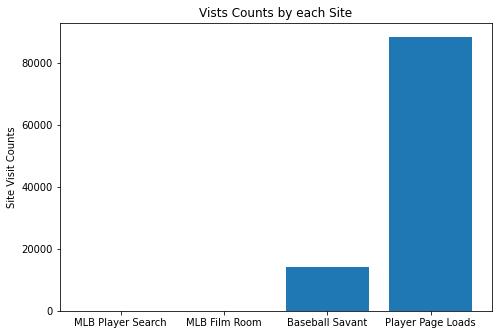

In [743]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(site_names,site_counts)
ax.set_ylabel('Site Visit Counts')
ax.set_title('Vists Counts by each Site')

In [675]:
(metric_merge.groupby('name_display_full_fml')['2021-06'].sum()).sort_values(ascending=False)

name_display_full_fml
Shohei Ohtani                18517265
Michael Nelson Trout          1936420
Aaron James Judge             1705842
Gerrit Alan Cole              1480575
Jacob Anthony deGrom          1096135
                               ...   
Luis Angel Gil                   6311
Khalil Rashad Lee                4926
Robert Harris Hassell III        2779
Camilo Doval                      400
Nelson Javier Velazquez            42
Name: 2021-06, Length: 91, dtype: int64

### Correlation

form a dataframe with names in one column and its respective count in the other

- some dataframes already have a visits column so could just try .corr/Pearson on each other and see what scores I get?

- if its just scatterplots, then get some cool players' dates and visit counts and plot those
- combine scatterplots and see the cool correlations

In [1244]:

player_page_loads = pd.read_gbq('''
        

    WITH initial_query AS (

    SELECT DISTINCT page_url, visit
    FROM `mlb-bdataml-prod-da8f.video_recommendation_engine_clickstream.page_loads`

        WHERE (page_url LIKE '%mlb.com/player/%')
        AND date_time_date >= '2022-06-01' AND date_time_date < '2022-06-24'
    )




        SELECT page_url, count(*) as visits
        FROM initial_query
        GROUP BY page_url
        ORDER BY 2 desc
        
        


        ''' )

Downloading: 100%|██████████| 198550/198550 [00:06<00:00, 31094.02rows/s]


In [1246]:
player_page_loads = player_page_loads.rename(columns={"visits": "2022-06"})

In [1247]:
test_page = test_page.merge(player_page_loads, how = 'inner')

In [1250]:
full_player_page = test_page

In [1092]:
#player_page_loads.to_csv('gs://mlb-bdataml-npd-kubeflow/ml-data/player_page_loads/test.csv', index = False)

In [1176]:
#!pip install gcsfs

In [1252]:
names = []
for i in full_player_page['page_url']:
    if '?' in i:
        m = re.search('[^\/]+(.)?\?', i)
        temp = m.group(0)
        names.append(temp[:-1])
    else:
        m = re.search('[^/]+(?=/$|$)', i)
        if '#' in m.group(0):
            n = re.search('^[^#]*',m.group(0))
            names.append(n.group(0))
        else:
            names.append(m.group(0))

In [1253]:
full_player_page['construct'] = names
full_player_page['name'] = full_player_page['construct'].apply(lambda x: "-".join(x.split("-")[:2]))
full_player_page['name'] = full_player_page['name'].apply(lambda x: x.replace('-',' '))
full_player_page['player_id'] = full_player_page['construct'].apply(lambda x: x.split('-')[-1:][0])
full_player_page = full_player_page.head(3000)
full_player_page['player_id'] = pd.to_numeric(full_player_page["player_id"])
full_player_page['player_id'] = (full_player_page['player_id']).fillna(0.0).astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.com/v3/__https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html*returning-a-view-versus-a-copy*5Cn__;IyU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXHWaGMrQ$    
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.com/v3/__https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html*returning-a-view-versus-a-copy*5Cn__;IyU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXHWaGMrQ$    import sys


In [1259]:
merged = full_player_page.merge(data, how = 'left')

In [1264]:
merged.head()

,page_url,2021-06,2021-08,2021-07,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,construct,name,player_id,name_display_full_fml,first_last
0,https://urldefense.com/v3/__https://www.mlb.com/player/shohei-ohtani-660271__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqU13e5xGw$,388340,383715,598197,333423,99348,30960,13082,8326,6279,26621,176386,240165,151806,shohei-ohtani-660271,shohei ohtani,660271,Shohei Ohtani,Shohei Ohtani
1,https://urldefense.com/v3/__https://www.mlb.com/player/hyun-jin-ryu-547943__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXd5q0lQw$,225466,72845,172554,54422,13250,3131,2741,1891,2063,7413,22780,35363,11221,hyun-jin-ryu-547943,hyun jin,547943,Hyun Jin Ryu,Hyun Jin Ryu
2,https://urldefense.com/v3/__https://www.mlb.com/player/jacob-degrom-594798__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqV4EcF6Fw$,206859,28330,101112,15263,5491,4966,2823,1761,2106,8998,9821,6501,4373,jacob-degrom-594798,jacob degrom,594798,Jacob Anthony deGrom,Jacob deGrom
3,https://urldefense.com/v3/__https://www.mlb.com/player/fernando-tatis-jr-6__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWjXe7yXg$ ...,92983,64087,85244,73883,25190,6906,2708,2921,1964,5842,9356,7910,5712,fernando-tatis-jr-665487,fernando tatis,665487,Fernando Tatis Jr.,Fernando Tatis Jr.
4,https://urldefense.com/v3/__https://www.mlb.com/player/albert-pujols-405395__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXJWPhSFA$,69784,64683,68319,55898,38693,3001,1711,1863,1591,17891,60655,60708,27476,albert-pujols-405395,albert pujols,405395,Jose Alberto Pujols,Jose Pujols


In [1505]:
corr = merged[merged['player_id'] == 660271]
corr = corr.groupby(['player_id'])["2021-06", "2021-07", '2021-08', '2021-09','2021-10','2021-11','2021-12',
                           '2022-01','2022-02','2022-03','2022-04','2022-05','2022-06'].apply(lambda x : x.astype(int).sum())
corr = corr.stack().reset_index()
corr = corr.rename(columns = {corr.columns[1]:'date', corr.columns[2]: 'count'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#savant

In [1471]:
savant_page_loads = pd.read_gbq('''

WITH initial_query AS (

SELECT DISTINCT page_url, visit
FROM `mlb-bdataml-prod-da8f.video_recommendation_engine_clickstream.page_loads` 

    WHERE page_url LIKE 'https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player*'*5Cn__;JSU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWPR02sRA$      AND date_time_date >= '2022-06-01' AND date_time_date < '2022-07-01'
)

SELECT page_url, count(*) as visits
FROM initial_query
GROUP BY page_url
ORDER BY 2 desc


''')

Downloading: 100%|██████████| 30208/30208 [00:00<00:00, 35552.79rows/s]


In [1472]:
savant_page_loads = savant_page_loads.rename(columns={"visits": "2022-06"})

In [1473]:
#savant_full = savant_page_loads

In [1474]:
savant_full = savant_full.merge(savant_page_loads, how = 'inner')

In [1476]:
sav_temp = savant_full

In [1477]:
savant_names = []
for i in savant_full['page_url']:
    if '?' in i:
        m = re.search('[^\/]+(.)?\?', i)
        temp = m.group(0)
        savant_names.append(temp[:-1])
    else:
        m = re.search('[^/]+(?=/$|$)', i)
        savant_names.append(m.group(0))

In [1478]:
savant_full['construct'] = savant_names

In [1489]:
savant_full['name'] = savant_full['construct'].apply(lambda x: "-".join(x.split("-")[:2]))
savant_full['name'] = savant_full['name'].apply(lambda x: x.replace('-',' '))
savant_full['player_id'] = savant_full['construct'].apply(lambda x: x.split('-')[-1:][0])
savant_full = savant_full.head(2000)
savant_full['player_id'] = pd.to_numeric(savant_full["player_id"])
savant_full['player_id'] = (savant_full['player_id']).fillna(0.0).astype(int)

In [1490]:
savant_full.head()

,page_url,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,construct,name,player_id
0,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/j__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVJSM2nqg$ ...,26729,7839,3047,2387,2135,2019,2051,1984,1904,3482,3102,2607,1523,jacob-degrom-594798,jacob degrom,594798
1,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/s__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqW3mSKPCQ$ ...,22637,26138,16380,12469,5863,4334,3113,3007,2686,4376,18510,25272,14259,shohei-ohtani-660271,shohei ohtani,660271
2,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/g__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXzvjU4EA$ ...,18088,6289,3424,4221,3340,1381,840,910,891,1983,8903,7425,5592,gerrit-cole-543037,gerrit cole,543037
3,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/t__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqX8qx4l9g$ ...,15538,1531,814,617,749,567,484,723,646,693,982,732,409,trevor-bauer-545333,trevor bauer,545333
4,https://urldefense.com/v3/__https://baseballsavant.mlb.com/savant-player/s__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqW3mSKPCQ$ ...,10932,13112,7449,5488,2406,1666,1081,1038,978,1680,1334,1300,710,shohei-ohtani-660271,shohei ohtani,660271


In [1491]:
savant_merge =  savant_full.merge(data, how = 'left')

In [1503]:
corr2 = savant_merge[savant_merge['player_id'] == 660271]
corr2 = corr2.groupby(['player_id'])["2021-06", "2021-07", '2021-08', '2021-09','2021-10','2021-11','2021-12',
                           '2022-01','2022-02','2022-03','2022-04','2022-05','2022-06'].apply(lambda x : x.astype(int).sum())
corr2 = corr2.stack().reset_index()
corr2 = corr2.rename(columns = {corr2.columns[1]:'date', corr2.columns[2]: 'count'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


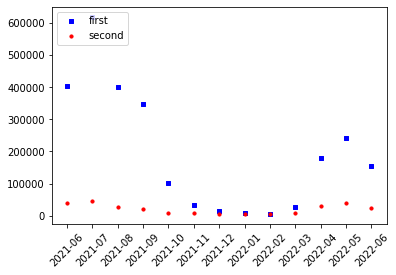

In [1529]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x=corr['date'], y=corr['count'], s=10, c='b', marker="s", label='first')
ax1.scatter(x=corr2['date'], y=corr2['count'], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left')
plt.xticks(rotation = 45)
plt.show()

In [1530]:
#mlb film room

In [1671]:
film_room_searches = pd.read_gbq('''

WITH initial_query AS (

SELECT DISTINCT page_url, visit
FROM `mlb-bdataml-prod-da8f.video_recommendation_engine_clickstream.page_loads` 

    WHERE page_url LIKE 'https://urldefense.com/v3/__https://www.mlb.com/video/search?q=*'*5Cn__;JSU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWhR2HZSw$      AND date_time_date >= '2022-06-01' AND date_time_date < '2022-06-27'
)

SELECT page_url, count(*) as visits
FROM initial_query
GROUP BY page_url
ORDER BY 2 desc
''')

Downloading: 100%|██████████| 20145/20145 [00:00<00:00, 29952.91rows/s]


In [1672]:
film_room_searches = film_room_searches.rename(columns={"visits": "2022-06"})

In [1673]:
#film_full = film_room_searches

In [1674]:
film_full = film_full.merge(film_room_searches, how = 'outer')

In [1676]:
film_temp = film_full

In [1677]:
film_full = film_full.fillna(0)

In [1678]:
film_full

,page_url,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-02,2022-01,2022-03,2022-04,2022-05,2022-06
0,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=BatterId**A3__;KyU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqV76DcdVw$ ...,3175.0,2299.0,1681.0,2701.0,678.0,86.0,1.0,0.0,0.0,30.0,24.0,5.0,3.0
1,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=BatterId**A3__;KyU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqV76DcdVw$ ...,2929.0,4299.0,2695.0,1866.0,488.0,108.0,2.0,0.0,0.0,11.0,23.0,8.0,7.0
2,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=BatterId**A3__;KyU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqV76DcdVw$ ...,716.0,508.0,483.0,398.0,102.0,28.0,1.0,0.0,0.0,8.0,11.0,11.0,7.0
3,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=ContentTags__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVFHLIqRw$ ...,531.0,853.0,538.0,511.0,603.0,776.0,32.0,0.0,0.0,423.0,691.0,606.0,431.0
4,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=ContentTags__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVFHLIqRw$ ...,526.0,902.0,550.0,336.0,156.0,90.0,5.0,0.0,0.0,31.0,172.0,304.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61930,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=PitcherId**A__;KyU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWmHP0QaQ$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61931,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Corey*Seage__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWlW_lCog$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61932,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=PitcherId**A__;KyU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWmHP0QaQ$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61933,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=BatterId**A3__;KyU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqV76DcdVw$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1685]:
queries = []
for i in film_full['page_url']:
    m = re.search('(?<=q=)([^&]*)(?=&)?', i)
    if len(m.group(0)) < 30:
        queries.append(m.group(0))
    else: 
        queries.append("")
film_full['construct'] = queries
for i in film_full['construct']:
    if '+' in i:
        film_full['construct'].apply(lambda x: x.replace('+',' '))
    else:
        continue
        
film_full['construct'] = film_full['construct'].apply(lambda x: x.replace('+',' '))
film_full['first_last'] = film_full['construct']


In [1689]:
film_merged = film_full.merge(data, how = 'left')
film_merged = film_merged.dropna()

In [1690]:
film_merged

,page_url,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-02,2022-01,2022-03,2022-04,2022-05,2022-06,construct,first_last,player_id,name_display_full_fml
135,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Shohei*Ohta__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqV_eZ3moQ$ ...,2.0,13.0,36.0,73.0,119.0,68.0,3.0,0.0,0.0,56.0,158.0,289.0,139.0,Shohei Ohtani,Shohei Ohtani,660271.0,Shohei Ohtani
460,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Carl*Yastrz__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVYDz4MlA$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,9.0,0.0,2.0,Carl Yastrzemski,Carl Yastrzemski,124650.0,Carl Michael Yastrzemski
461,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Carl*Yastrz__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVYDz4MlA$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,9.0,0.0,2.0,Carl Yastrzemski,Carl Yastrzemski,569209.0,Carl Michael Yastrzemski Jr.
467,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Adley*Rutsc__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVpdX6k5A$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1.0,20.0,9.0,Adley Rutschman,Adley Rutschman,668939.0,Adley Stan Rutschman
511,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Bryce*Harpe__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVu6v79fQ$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5.0,14.0,12.0,Bryce Harper,Bryce Harper,547180.0,Bryce Aron Max Harper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62078,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Jason*Varit__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqW-tn2K2w$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jason Varitek,Jason Varitek,123660.0,Jason Andrew Varitek
62226,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Corey*Seage__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWlW_lCog$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Corey Seager,Corey Seager,608369.0,Corey Drew Seager
62319,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Corey*Seage__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqWlW_lCog$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Corey Seager,Corey Seager,608369.0,Corey Drew Seager
62339,https://urldefense.com/v3/__https://www.mlb.com/video/search?q=Jermaine*Pa__;Kw!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqW9ewQcIA$ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jermaine Palacios,Jermaine Palacios,650339.0,Jermaine Manuel Palacios


In [1691]:
corr3 = film_merged[film_merged['player_id'] == 660271]
corr3 = corr3.groupby(['player_id'])["2021-06", "2021-07", '2021-08', '2021-09','2021-10','2021-11','2021-12',
                           '2022-01','2022-02','2022-03','2022-04','2022-05','2022-06'].apply(lambda x : x.astype(int).sum())
corr3 = corr3.stack().reset_index()
corr3 = corr3.rename(columns = {corr3.columns[1]:'date', corr3.columns[2]: 'count'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


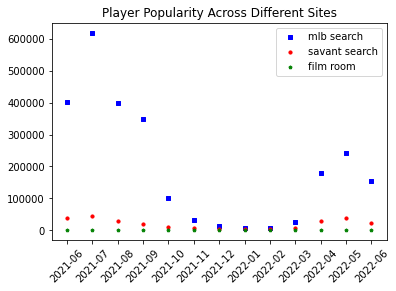

In [1701]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x=corr['date'], y=corr['count'], s=10, c='b', marker="s", label='mlb search')
ax1.scatter(x=corr2['date'], y=corr2['count'], s=10, c='r', marker="o", label='savant search')
ax1.scatter(x=corr3['date'], y=corr3['count'], s=10, c='g', marker="p", label='film room')
plt.legend(loc='upper right')
plt.xticks(rotation = 45)
plt.title("Player Popularity Across Different Sites")
plt.show()

Keep in mind that 6/22 is ongoing so data is not fully collected

In [1874]:
corr = merged
corr = corr.groupby(['player_id'])["2021-06", "2021-07", '2021-08', '2021-09','2021-10','2021-11','2021-12',
                           '2022-01','2022-02','2022-03','2022-04','2022-05','2022-06'].apply(lambda x : x.astype(int).sum())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1875]:
corr = corr.stack().reset_index()
corr = corr.rename(columns = {corr.columns[1]:'date', corr.columns[2]: 'mlb_count'})

In [1858]:
corr2 = savant_merge
corr2 = corr2.groupby(['player_id'])["2021-06", "2021-07", '2021-08', '2021-09','2021-10','2021-11','2021-12',
                           '2022-01','2022-02','2022-03','2022-04','2022-05','2022-06'].apply(lambda x : x.astype(int).sum())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1859]:
corr2 = corr2.stack().reset_index()
corr2 = corr2.rename(columns = {corr2.columns[1]:'date', corr2.columns[2]: 'savant_count'})

In [1860]:
corr3 = film_merged
corr3 = corr3.groupby(['player_id'])["2021-06", "2021-07", '2021-08', '2021-09','2021-10','2021-11','2021-12',
                           '2022-01','2022-02','2022-03','2022-04','2022-05','2022-06'].apply(lambda x : x.astype(int).sum())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1861]:
corr3 = corr3.stack().reset_index()
corr3 = corr3.rename(columns = {corr3.columns[1]:'date', corr3.columns[2]: 'film_count'})

In [1736]:
check = check.merge(corr3, how = 'inner')

In [1876]:
check2 = corr.merge(corr2, how = 'inner')

In [1877]:
check2 = check2.merge(corr3, how = 'inner')

In [1886]:
check2['player_id'] = check2['player_id'].astype(str)

In [1898]:
check2

,player_id,date,mlb_count,savant_count,film_count
0,111188,2021-06,2124,231,0
1,111188,2021-07,2736,237,0
2,111188,2021-08,2595,249,0
3,111188,2021-09,2753,273,0
4,111188,2021-10,2254,215,0
...,...,...,...,...,...
4441,691026,2022-02,42,21,0
4442,691026,2022-03,67,35,0
4443,691026,2022-04,134,75,0
4444,691026,2022-05,243,128,0


In [1887]:
check2.corr(method='pearson')

,mlb_count,savant_count,film_count
mlb_count,1.000000,0.771683,0.074404
savant_count,0.771683,1.000000,0.118716
film_count,0.074404,0.118716,1.000000


In [1740]:
met = metrics_gap

In [1742]:
met['player_id'] = met["player_id"].str[9:]

In [1747]:
met['player_id'] = met['player_id'].astype(float)

In [1752]:
met['player_id'] = met['player_id'].astype(int, errors = 'ignore')

In [1783]:
metr = met.drop(columns=['gap_count', 'CPC', 'Volume', 'Traffic Share', 'Keywords','Leader', 'Clicked', 'Non-Clicked', '2021-04', '2021-05'])

In [1784]:
metr

,player_id,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
12,660271.0,"1,424,405","3,522,067","1,526,172","1,112,328","579,079","446,508","237,176","328,635","252,952","255,862"
43,518692.0,"99,382","214,942","196,105","120,110","508,577","930,444","414,413","207,846","244,103","2,757,190"
33,545361.0,"484,105","874,295","676,181","326,054","246,467","182,973","130,324","164,884","182,300","263,313"
15,453286.0,"345,213","948,819","456,773","552,683","668,647","738,866","207,011","98,085","114,821","300,379"
39,594798.0,"1,096,135","518,797","239,974","149,306","76,253","74,811","51,272","32,583","43,850","127,979"
...,...,...,...,...,...,...,...,...,...,...,...
100,NaN,"3,719","4,989","4,199","1,845","1,820","2,668","4,727","2,858",960,"1,919"
84,690987.0,"2,779","8,748","5,833","6,222","3,564","1,158","1,077","1,581","3,626","6,154"
85,690987.0,480,"6,279",688,948,"1,020",693,260,260,600,330
62,663647.0,"2,918","1,305","1,855",727,304,"1,183",0,982,210,536


In [1831]:
#metr = metr.stack().reset_index()
stacked = metr.set_index('player_id').stack()
# set the name of the new series created
df = stacked.reset_index()
# drop the 'source' level (key.*)
#df.drop('level_1', axis=1, inplace=True)
df

,player_id,level_1,0
0,660271.0,2021-06,"1,424,405"
1,660271.0,2021-07,"3,522,067"
2,660271.0,2021-08,"1,526,172"
3,660271.0,2021-09,"1,112,328"
4,660271.0,2021-10,"579,079"
...,...,...,...
1005,676369.0,2021-11,"1,926"
1006,676369.0,2021-12,880
1007,676369.0,2022-01,"1,376"
1008,676369.0,2022-02,405


In [1832]:
df

,player_id,level_1,0
0,660271.0,2021-06,"1,424,405"
1,660271.0,2021-07,"3,522,067"
2,660271.0,2021-08,"1,526,172"
3,660271.0,2021-09,"1,112,328"
4,660271.0,2021-10,"579,079"
...,...,...,...
1005,676369.0,2021-11,"1,926"
1006,676369.0,2021-12,880
1007,676369.0,2022-01,"1,376"
1008,676369.0,2022-02,405


In [1890]:
df = df.rename(columns = {df.columns[1]:'date', df.columns[2]: 'similarweb_count'})

In [1834]:
df['player_id'] = df['player_id'].astype(int, errors = 'ignore')

In [1841]:
df.head(15)

,player_id,date,count4
0,660271.0,2021-06,"1,424,405"
1,660271.0,2021-07,"3,522,067"
2,660271.0,2021-08,"1,526,172"
3,660271.0,2021-09,"1,112,328"
4,660271.0,2021-10,"579,079"
5,660271.0,2021-11,"446,508"
6,660271.0,2021-12,"237,176"
7,660271.0,2022-01,"328,635"
8,660271.0,2022-02,"252,952"
9,660271.0,2022-03,"255,862"


In [1843]:
tcheck = check.merge(df, how = 'left')

In [1845]:
tcheck.head(19)

,player_id,date,count,count2,count3,count4
0,660271,2021-06,402456,39188,2,"1,424,405"
1,660271,2021-07,618967,45507,13,"3,522,067"
2,660271,2021-08,399165,27832,36,"1,526,172"
3,660271,2021-09,347220,20814,73,"1,112,328"
4,660271,2021-10,102741,9857,119,"579,079"
5,660271,2021-11,32424,7190,68,"446,508"
6,660271,2021-12,13602,4978,3,"237,176"
7,660271,2022-01,8711,4900,0,"328,635"
8,660271,2022-02,6578,4480,0,"252,952"
9,660271,2022-03,27217,7049,58,"255,862"


In [1838]:
tcheck['count4'] = tcheck['count4'].str.replace(',', '').astype(int)

In [1839]:
tcheck.corr(method='pearson')

,player_id,count,count2,count3,count4
player_id,NaN,NaN,NaN,NaN,NaN
count,NaN,1.000000,0.971121,-0.099708,0.936853
count2,NaN,0.971121,1.000000,-0.196250,0.916172
count3,NaN,-0.099708,-0.196250,1.000000,-0.160572
count4,NaN,0.936853,0.916172,-0.160572,1.000000


In [1891]:
check2['player_id'] = check2['player_id'].astype(int)

In [1902]:
sw_check = check2.merge(df, how = 'inner')

In [1]:
sw_check

NameError: name 'sw_check' is not defined

In [1904]:
sw_check['similarweb_count'] = sw_check['similarweb_count'].str.replace(',', '').astype(int)

In [1905]:
sw_check['player_id'] = sw_check['player_id'].astype(str)

In [1906]:
sw_check.corr(method='pearson')

,mlb_count,savant_count,film_count,similarweb_count
mlb_count,1.000000,0.909117,0.336424,0.894280
savant_count,0.909117,1.000000,0.318385,0.862906
film_count,0.336424,0.318385,1.000000,0.310266
similarweb_count,0.894280,0.862906,0.310266,1.000000


### Article Work

In [747]:
articles = pd.read_gbq('''

SELECT *, JSON_EXTRACT_SCALAR(tag, '$.neutralSlug') as player_id
FROM `mlb-dataeng-prod.bdata_sharing.deltatre_cms_stories`
JOIN UNNEST(JSON_EXTRACT_ARRAY(tags)) AS tag

WHERE content_language = 'en-us'
    AND 
        EXISTS(
                SELECT * FROM UNNEST(JSON_EXTRACT_ARRAY(tags)) AS tag
                WHERE JSON_EXTRACT(tag, '$.slug') LIKE '%playerid%'
            )
    AND 
        JSON_EXTRACT_SCALAR(tag, '$.neutralSlug') like "playerid%"
    AND content_created_date > '2020-01-01'
''')

Downloading: 100%|██████████| 43731/43731 [00:36<00:00, 1191.12rows/s]


In [749]:
articles['date'] = pd.to_datetime(articles['content_created_date']).dt.date

In [750]:
articles['month'] = pd.DatetimeIndex(articles['date']).month

In [751]:
articles['year'] = pd.DatetimeIndex(articles['date']).year

In [752]:
articles = articles[articles['month']>=4]

In [753]:
articles = articles[articles['month']<= 10]

In [754]:
articles = articles[articles['year']==2021]

In [921]:
data['player_id'] = 'playerid-' + data['player_id'].astype(str)

In [1007]:
#articles_merged = articles.merge(data, how = 'left')

In [945]:
metrics_names = pd.DataFrame(metrics['Keywords'])

In [1008]:
#articles_merged['Keywords'] = articles_merged['first_last'].str.lower()

In [975]:
data_test = metrics.merge(articles_merged, how = 'left')

In [977]:
data_test = data_test.drop_duplicates(subset=['Keywords'])

In [988]:
data_test.loc[data_test.Keywords=='freddie freeman', 'player_id'] = 'playerid-518692'
data_test.loc[data_test.Keywords=='mike trout', 'player_id'] = 'playerid-545361'
data_test.loc[data_test.Keywords=='max scherzer', 'player_id'] = 'playerid-453286'
data_test.loc[data_test.Keywords=='kris bryant', 'player_id'] = 'playerid-592178'
data_test.loc[data_test.Keywords=='mookie betts', 'player_id'] = 'playerid-605141'
data_test.loc[data_test.Keywords=='vladimir guerrero jr', 'player_id'] = 'playerid-665489'
data_test.loc[data_test.Keywords=='pete alonso', 'player_id'] = 'playerid-624413'
data_test.loc[data_test.Keywords=='manny machado', 'player_id'] = 'playerid-592518'
data_test.loc[data_test.Keywords=='matt olson', 'player_id'] = 'playerid-621566'
data_test.loc[data_test.Keywords=='alex verdugo', 'player_id'] = 'playerid-657077'
data_test.loc[data_test.Keywords=='javy baez', 'player_id'] = 'playerid-595879'
data_test.loc[data_test.Keywords=='bobby witt jr', 'player_id'] = 'playerid-677951'
data_test.loc[data_test.Keywords=='tim anderson', 'player_id'] = 'playerid-641313'
data_test.loc[data_test.Keywords=='austin riley', 'player_id'] = 'playerid-663586'
data_test.loc[data_test.Keywords=='alex bregman', 'player_id'] = 'playerid-608324'
data_test.loc[data_test.Keywords=='joey bart', 'player_id'] = 'playerid-663698'
data_test.loc[data_test.Keywords=='cedric mullins', 'player_id'] = 'playerid-656775'
data_test.loc[data_test.Keywords=='jazz chisholm', 'player_id'] = 'playerid-665862'
data_test.loc[data_test.Keywords=='ozzie albies', 'player_id'] = 'playerid-645277'
data_test.loc[data_test.Keywords=='austin martin', 'player_id'] = 'playerid-668885'
data_test.loc[data_test.Keywords=='ronald acuna jr', 'player_id'] = 'playerid-660670'
data_test.loc[data_test.Keywords=='hunter greene', 'player_id'] = 'playerid-668881'
data_test.loc[data_test.Keywords=='cj abrams', 'player_id'] = 'playerid-682928'
data_test.loc[data_test.Keywords=='nick pratto', 'player_id'] = 'playerid-668472'
data_test.loc[data_test.Keywords=='ronald acuna jr.', 'player_id'] = 'playerid-660670'
data_test.loc[data_test.Keywords=='bobby witt', 'player_id'] = 'playerid-124492'
data_test.loc[data_test.Keywords=='bobby witt jr.', 'player_id'] = 'playerid-677951'
data_test.loc[data_test.Keywords=='xavier edwards', 'player_id'] = 'playerid-669364'
data_test.loc[data_test.Keywords=='robert hassell iii', 'player_id'] = 'playerid-690987'
data_test.loc[data_test.Keywords=='ke’bryan hayes', 'player_id'] = 'playerid-663647'

In [1055]:
(data_test.head(3))
data_test = data_test[['Keywords', 'player_id']]

In [1056]:
articles_merged = articles.merge(data_test, how = 'inner')

In [1012]:
#articles_merged = articles_merged.merge(metrics_names, how = 'inner')

In [1058]:
gaps = {}

for i in articles_merged['player_id']:
    temp = articles_merged[articles_merged['player_id'] == i]
    gap_count = temp.sort_values('date').date.diff().max()
    gaps[i] = gap_count



In [1059]:
gaps

{'playerid-663656': Timedelta('29 days 00:00:00'),
 'playerid-665862': Timedelta('25 days 00:00:00'),
 'playerid-573186': Timedelta('18 days 00:00:00'),
 'playerid-660670': Timedelta('98 days 00:00:00'),
 'playerid-547180': Timedelta('21 days 00:00:00'),
 'playerid-624413': Timedelta('22 days 00:00:00'),
 'playerid-596019': Timedelta('21 days 00:00:00'),
 'playerid-519317': Timedelta('23 days 00:00:00'),
 'playerid-665489': Timedelta('13 days 00:00:00'),
 'playerid-660271': Timedelta('13 days 00:00:00'),
 'playerid-665742': Timedelta('23 days 00:00:00'),
 'playerid-607208': Timedelta('36 days 00:00:00'),
 'playerid-453286': Timedelta('10 days 00:00:00'),
 'playerid-595879': Timedelta('17 days 00:00:00'),
 'playerid-543037': Timedelta('14 days 00:00:00'),
 'playerid-592450': Timedelta('15 days 00:00:00'),
 'playerid-592885': Timedelta('17 days 00:00:00'),
 'playerid-571448': Timedelta('21 days 00:00:00'),
 'playerid-621111': Timedelta('17 days 00:00:00'),
 'playerid-663586': Timedelta('

In [1712]:
articles_merged[articles_merged['player_id'] == 'playerid-660670']['Keywords'].head(1)

Series([], Name: Keywords, dtype: object)

In [1062]:
gaps_df = pd.DataFrame.from_dict(gaps, orient = 'index')

In [1063]:
gaps_df.reset_index(inplace=True)
gaps_df = gaps_df.rename(columns = {'index':'player_id'})

In [1064]:
gaps_df.rename(columns={ gaps_df.columns[1]: "gap_count" }, inplace = True)

In [1066]:
new_metrics = gaps_df.merge(articles_merged, how = 'left')

In [1067]:
new_metrics = new_metrics[['player_id', 'gap_count', 'Keywords']]

In [1068]:
new_metrics = new_metrics.drop_duplicates(subset=['Keywords'])

In [1071]:
metrics_gap = new_metrics.merge(metrics, how = 'outer')

In [1312]:
metrics_gap['Traffic Share'] = metrics_gap['Traffic Share'].str.strip('%').astype(float)


In [1310]:
metrics_gap = metrics_gap.sort_values('Traffic Share', ascending=False)



In [1314]:
metrics_gap.head(15)

,player_id,gap_count,Keywords,Traffic Share,Volume,CPC,Leader,Clicked,Non-Clicked,2021-04,...,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
12,playerid-660271,13 days,shohei ohtani,16.37,"1,000,080",$0.86,mlb.com,44.35%,55.65%,"919,061",...,"1,424,405","3,522,067","1,526,172","1,112,328","579,079","446,508","237,176","328,635","252,952","255,862"
43,playerid-518692,20 days,freddie freeman,4.97,"506,309",$2.88,baseball-reference.com,43.16%,56.84%,"234,470",...,"99,382","214,942","196,105","120,110","508,577","930,444","414,413","207,846","244,103","2,757,190"
33,playerid-545361,35 days,mike trout,4.52,"428,286",$0.69,baseball-reference.com,43.35%,56.65%,"760,428",...,"484,105","874,295","676,181","326,054","246,467","182,973","130,324","164,884","182,300","263,313"
15,playerid-453286,10 days,max scherzer,4.36,"400,615",$0.82,baseball-reference.com,42.85%,57.15%,"180,133",...,"345,213","948,819","456,773","552,683","668,647","738,866","207,011","98,085","114,821","300,379"
39,playerid-594798,14 days,jacob degrom,3.76,"281,489",$0.71,baseball-reference.com,44.51%,55.49%,"557,062",...,"1,096,135","518,797","239,974","149,306","76,253","74,811","51,272","32,583","43,850","127,979"
34,playerid-592178,16 days,kris bryant,3.47,"379,601",$1.23,baseball-reference.com,41.17%,58.83%,"202,439",...,"210,314","1,343,289","619,801","273,616","256,944","240,922","238,055","134,550","130,805","654,999"
6,playerid-547180,21 days,bryce harper,3.32,"320,063",$0.51,baseball-reference.com,47.11%,52.89%,"626,987",...,"293,001","409,014","529,090","540,195","207,660","333,084","90,491","99,373","84,416","186,142"
28,playerid-621043,40 days,carlos correa,2.73,"278,181",$0.58,baseball-reference.com,42.46%,57.54%,"91,231",...,"64,807","96,588","107,182","114,728","441,737","698,126","381,959","136,184","106,379","1,015,904"
17,playerid-543037,14 days,gerrit cole,2.49,"215,651",$0.39,baseball-reference.com,45.97%,54.03%,"230,005",...,"493,525","404,234","239,516","318,499","343,290","80,579","56,072","21,884","40,765","70,766"
18,playerid-592450,15 days,aaron judge,2.31,"262,980",$1.31,baseball-reference.com,41.96%,58.04%,"380,814",...,"284,307","501,077","338,763","390,165","282,363","130,608","120,487","70,918","78,559","246,455"


In [1699]:
articles_merged[articles_merged['player_id'] == 'playerid-641355'].sort_values('date')

,slug,content_type,hb_content_id,content_language,content_entity_id,content_translation_id,content_created_date,content_last_updated_date,content_story_type,author_name,...,tags,parts,dw_add_tsp,dw_update_tsp,tag,player_id,date,month,year,Keywords
2903,cody-bellinger-justin-turner-home-run-confusion,story,None,en-us,6e86cacd-4d17-4410-8f42-488680c92679,94114d48-d291-4550-a554-c1bd1697610e,2021-04-02T03:08:00Z,2021-04-02T06:56:12.308Z,Article,Juan Toribio,...,"[{""neutralSlug"": ""storytype-article"", ""externa...",None,2021-04-02 09:10:55.895021+00:00,2021-04-02 09:10:55.895021+00:00,"{""neutralSlug"":""playerid-641355"",""externalSour...",playerid-641355,2021-04-02,4,2021,cody bellinger
2923,cody-bellinger-and-chris-taylor-injury-updates,story,None,en-us,71a1faf9-4786-4ce3-9a95-efdf7af03bd1,6d5a09fb-abef-4ebb-bea1-7b0a96da907e,2021-04-07T06:34:00Z,2021-04-07T06:37:29.701Z,Article,Juan Toribio,...,"[{""neutralSlug"": ""storytype-article"", ""externa...",None,2021-04-07 09:09:16.033648+00:00,2021-04-07 09:09:16.033648+00:00,"{""neutralSlug"":""playerid-641355"",""externalSour...",playerid-641355,2021-04-07,4,2021,cody bellinger
2914,mookie-betts-back-injury,story,None,en-us,29c54dc2-fca9-403c-a0b0-348204c8b485,be38a228-331d-4f2c-81da-9266d8f72345,2021-04-08T00:00:00Z,2021-04-08T00:00:44.074Z,Article,Jesse Sanchez,...,"[{""neutralSlug"": ""jesse-sanchez"", ""externalSou...",None,2021-04-08 09:08:22.045215+00:00,2021-04-08 09:08:22.045215+00:00,"{""neutralSlug"":""playerid-641355"",""externalSour...",playerid-641355,2021-04-08,4,2021,cody bellinger
2922,cody-bellinger-goes-on-il-with-calf-injury,story,None,en-us,4ced3a38-b6a3-426f-99ba-78c34f987874,6af6d2bd-7de7-4573-84d0-93a5838a7783,2021-04-09T21:25:00Z,2021-04-09T21:32:55.218Z,Article,Juan Toribio,...,"[{""neutralSlug"": ""storytype-article"", ""externa...",None,2021-04-10 09:07:06.808652+00:00,2021-04-10 09:07:06.808652+00:00,"{""neutralSlug"":""playerid-641355"",""externalSour...",playerid-641355,2021-04-09,4,2021,cody bellinger
2925,cody-bellinger-brusdar-graterol-injury-updates,story,None,en-us,b8eeac91-3dc6-409d-906d-76068e6fe5f6,e7a13136-d68d-4d1f-b05f-8d0e08c3f34c,2021-04-15T01:12:55.59Z,2021-04-16T23:54:59.894Z,Article,Juan Toribio,...,"[{""neutralSlug"": ""storytype-article"", ""externa...",None,2021-04-15 09:08:27.248744+00:00,2021-04-17 09:07:38.403907+00:00,"{""neutralSlug"":""playerid-641355"",""externalSour...",playerid-641355,2021-04-15,4,2021,cody bellinger
2909,cody-bellinger-hairline-fracture-left-leg,story,None,en-us,33b1267e-2f14-40be-a5e6-3a633548086b,2eec2cbd-9030-42e3-951a-c21cfc661565,2021-04-17T01:16:00Z,2021-04-17T01:26:34.136Z,Article,Juan Toribio,...,"[{""neutralSlug"": ""storytype-article"", ""externa...",None,2021-04-17 09:07:38.403907+00:00,2021-04-17 09:07:38.403907+00:00,"{""neutralSlug"":""playerid-641355"",""externalSour...",playerid-641355,2021-04-17,4,2021,cody bellinger
2906,cody-bellinger-injury-update-0422,story,None,en-us,3aff6105-9d2a-46ea-aee2-ecf89e3520f3,b1f149c2-f441-4914-80f6-55f38e68e791,2021-04-23T01:26:31.437Z,2021-04-23T01:26:31.437Z,Article,Juan Toribio,...,"[{""neutralSlug"": ""storytype-article"", ""externa...",None,2021-04-23 09:04:55.775743+00:00,2021-04-23 09:04:55.775743+00:00,"{""neutralSlug"":""playerid-641355"",""externalSour...",playerid-641355,2021-04-23,4,2021,cody bellinger
2927,cody-bellinger-joe-kelly-injury-updates,story,None,en-us,6edd9154-7a3a-4354-a73e-2ff39781ffbf,f19c1601-6cf7-4273-a41f-90f65757ab35,2021-04-28T02:04:00Z,2021-04-28T02:06:55.133Z,Article,Juan Toribio,...,"[{""neutralSlug"": ""storytype-article"", ""externa...",None,2021-04-28 09:10:22.227095+00:00,2021-04-28 09:10:22.227095+00:00,"{""neutralSlug"":""playerid-641355"",""externalSour...",playerid-641355,2021-04-28,4,2021,cody bellinger
2918,david-price-hamstring-injury-update,story,None,en-us,62054f79-cb67-4305-b5c6-cdc0c704fac6,4235b7d5-032a-4784-9f6b-01a99b8c6072,2021-05-15T01:25:38.19Z,2021-05-15T01:25:38.19Z,Article,Juan Toribio,...,"[{""

In [ ]:
#try to find reason for big gaps (among top 15 players)

- Acuna: tears ACL - gap tied by injury updates/team updates during their championship series
- Correas reason: covid + missed articles? 
- Trout: was on injured list (any articles coming out during time were status updates)
- Soto: 10/7 - 10/31 end of season for nationals
- Stanton: 6/29 - 7/22 combo of all star break + missing yankees articles?
- Lindor: small slump/minor injury
- Harper: end of season/2021 Hank Aaron Award updates/season highlights
- Freeman: small slump + missing articles
- Bellinger: coming off injury + missing article + visit to white house

- some gaps are tied with injury update searches - so maybe include those to update 'worried' fans
- some gaps are for end of season so makes sense theres no consistent game news. However, some of those gaps are tied with season highlights so maybe promote season highlights when the season ends
- some gaps are tied with small slump mentions - somehow incorporate a slump update+tracker for big players? not sure how i feel about this 

In [ ]:
#performance